# Imports

In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Read Dataset

In [2]:
df = pd.read_csv("../Static_dataset.csv")
df

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268069,33:51.5,18,3,0,16,0,2.338623,2,3,10,5.333333,alma,almaalomah,14,1,0
268070,36:02.5,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,0
268071,37:21.5,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
268072,24:25.1,16,0,0,14,0,3.249687,2,2,13,7.500000,radio,radio-vintage,14,0,0


* Feature understanding reference: http://ahlashkari.com/Datasets-DNS-Exfiltration-Traffic.asp<br><br>
F17 - FQDN_count - Total count of characters in FQDN - stateless<br>
F18 - subdomain_length - Count of characters in subdomain - stateless<br>
F19 - upper - Count of uppercase characters - stateless<br>
F20 - lower - Count of lowercase characters - stateless<br>
F21 - numeric - Count of numerical characters - stateless<br>
F22 - entropy - Entropy of query name: H(X)=-∑_(k=1)^N▒〖P(x_k)log_2⁡〖P(x_k)〗 〗, X=query name, N=total number of unique characters, P(x_k )=the probability of the k-th symbol - stateless<br>
F23 - special - Number of special characters; special characters such as dash, underscore, equal sign, space, tab - stateless<br>
F24 - labels - Number of labels; e.g., in the query name "www.scholar.google.com", there are four labels separated by dots - stateless F25 - labels_max - Maximum label length - stateless<br>
F26 - labels_average - Average label length - stateless<br>
F27 - longest_word - Longest meaningful word over domain length average - stateless<br>
F28 - sld - Second level domain - stateless<br>
F29 - len - Length of domain and subdomain - stateless<br>
F30 - subdomain - Whether the domain has subdomain or not - stateless

# Data Cleaning

## Check Nulls and Nans

In [ ]:
df.isna().sum()

timestamp           0
FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
longest_word        8
sld                 0
len                 0
subdomain           0
Target Attack       0
dtype: int64

In [ ]:
df.isnull().sum()

timestamp           0
FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
longest_word        8
sld                 0
len                 0
subdomain           0
Target Attack       0
dtype: int64

In [10]:
df[df.longest_word.isna()]

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
45325,16:29.0,9,0,0,8,0,1.820802,1,2,5,4.000000,NaN,nanit,6,0,0
73336,29:00.1,10,0,0,9,0,2.120590,1,2,6,4.500000,NaN,nullpk,7,0,0
105457,49:32.5,13,3,0,11,0,2.067168,2,3,5,3.666667,NaN,nanit,9,1,0
119612,49:32.4,9,0,0,8,0,1.820802,1,2,5,4.000000,NaN,nanit,6,0,0
194276,55:23.2,10,0,0,9,0,2.120590,1,2,6,4.500000,NaN,nullpk,7,0,0
207153,55:23.3,10,0,0,9,0,2.120590,1,2,6,4.500000,NaN,nullpk,7,0,0
233632,29:00.0,10,0,0,9,0,2.120590,1,2,6,4.500000,NaN,nullpk,7,0,0
247640,16:29.2,13,3,0,11,0,2.067168,2,3,5,3.666667,NaN,nanit,9,1,0


<AxesSubplot:xlabel='Target Attack', ylabel='count'>

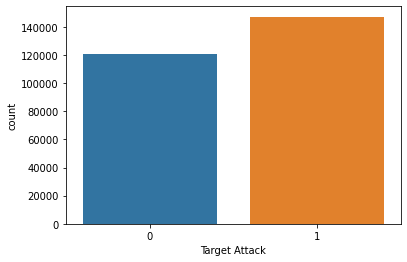

In [116]:
sns.countplot(data = df, x= "Target Attack")

In [118]:
df["Target Attack"].value_counts()

1    147179
0    120895
Name: Target Attack, dtype: int64

the longest_word column have 8 Nans cells. also, all these records are belonging the minority class 0 <br>
so, I have 2 options:<br>
1- remove these records as they are very few. 0.0066 % of the class 0.<br>
2- keep all the eacords of the minority class and just replace the 8 values by the mode (the most stable and frequnt value) of longest_word column for class 0.<br>
and I will apply the second option as it is the minority class and don't want to lose any of it.

In [3]:
longest_word_mode  = df.longest_word[df["Target Attack"]==0].mode()[0]
longest_word_mode

'2'

In [4]:
df.longest_word.fillna(longest_word_mode, inplace=True)
df.longest_word.isna().sum()

0

## Check Categorical and String values

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268074 entries, 0 to 268073
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         268074 non-null  object 
 1   FQDN_count        268074 non-null  int64  
 2   subdomain_length  268074 non-null  int64  
 3   upper             268074 non-null  int64  
 4   lower             268074 non-null  int64  
 5   numeric           268074 non-null  int64  
 6   entropy           268074 non-null  float64
 7   special           268074 non-null  int64  
 8   labels            268074 non-null  int64  
 9   labels_max        268074 non-null  int64  
 10  labels_average    268074 non-null  float64
 11  longest_word      268074 non-null  object 
 12  sld               268074 non-null  object 
 13  len               268074 non-null  int64  
 14  subdomain         268074 non-null  int64  
 15  Target Attack     268074 non-null  int64  
dtypes: float64(2), int64

The data type of timestamp, longest_word, and sld is an object so we need to convert them into Integers type.<br>
we can ignore timestamp column as it's just a record ID and we are dealing with stateless features.

Getting description about the values of the columns

In [14]:
df.longest_word.describe()

count     268074
unique      6224
top            2
freq      109989
Name: longest_word, dtype: object

In [15]:
df.longest_word.value_counts()

2          109989
4           70188
N            4498
C            2969
9            1906
            ...  
yaa             1
queue           1
kit             1
airdrop         1
mal             1
Name: longest_word, Length: 6224, dtype: int64

In [16]:
df.sld.value_counts()

192                                 109517
224                                  70188
FHEPFCELEHFCEPFFFACACACACACACABN      4498
DESKTOP-3JF04TC                       1961
239                                   1906
                                     ...  
freesgift                                1
secureserver                             1
airdropalert                             1
queue-it                                 1
lahemal                                  1
Name: sld, Length: 11112, dtype: int64

### Convert longest_word, and sld columns string values with the string length

In [5]:
df.longest_word = df.longest_word.apply(lambda x: len(x) if isinstance(x,str) and not x.isnumeric() else x).astype(int)
df.sld = df.sld.apply(lambda x: len(x) if isinstance(x,str) and not x.isnumeric() else x).astype(int)
df

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,5,5,15,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268069,33:51.5,18,3,0,16,0,2.338623,2,3,10,5.333333,4,10,14,1,0
268070,36:02.5,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,0
268071,37:21.5,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
268072,24:25.1,16,0,0,14,0,3.249687,2,2,13,7.500000,5,13,14,0,0


# Distribution Analysis

In [18]:
df.describe()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
count,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000
mean,22.286596,6.059021,0.845420,10.410014,6.497586,2.485735,4.533577,4.788823,8.252233,4.802239,3.303170,154.548371,12.576714,0.753497,0.549024
std,6.001205,3.899505,4.941929,3.207725,4.499866,0.407709,2.187683,1.803256,4.415355,4.573066,1.732016,2007.793941,4.177828,0.430975,0.497592
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.219195,0.000000,1.000000,2.000000,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000
25%,18.000000,3.000000,0.000000,10.000000,0.000000,2.054029,2.000000,3.000000,7.000000,3.166667,2.000000,13.000000,11.000000,1.000000,0.000000
50%,24.000000,7.000000,0.000000,10.000000,8.000000,2.570417,6.000000,6.000000,7.000000,3.666667,3.000000,192.000000,12.000000,1.000000,1.000000
75%,27.000000,10.000000,0.000000,10.000000,10.000000,2.767195,6.000000,6.000000,7.000000,4.000000,4.000000,224.000000,14.000000,1.000000,1.000000
max,36.000000,23.000000,32.000000,34.000000,12.000000,4.216847,7.000000,7.000000,32.000000,32.000000,16.000000,365838.000000,33.000000,1.000000,1.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268074 entries, 0 to 268073
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         268074 non-null  object 
 1   FQDN_count        268074 non-null  int64  
 2   subdomain_length  268074 non-null  int64  
 3   upper             268074 non-null  int64  
 4   lower             268074 non-null  int64  
 5   numeric           268074 non-null  int64  
 6   entropy           268074 non-null  float64
 7   special           268074 non-null  int64  
 8   labels            268074 non-null  int64  
 9   labels_max        268074 non-null  int64  
 10  labels_average    268074 non-null  float64
 11  longest_word      268074 non-null  int32  
 12  sld               268074 non-null  int32  
 13  len               268074 non-null  int64  
 14  subdomain         268074 non-null  int64  
 15  Target Attack     268074 non-null  int64  
dtypes: float64(2), int32

## Skewness

reference: https://www.scribbr.com/statistics/skewness/

In [135]:
df.skew()

C:\Users\river\AppData\Local\Temp/ipykernel_15336/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


FQDN_count           -1.101731
subdomain_length     -0.590480
upper                 5.988737
lower                 0.343449
numeric              -0.594384
entropy              -0.140156
special              -0.902972
labels               -0.903680
labels_max            3.979910
labels_average        5.087081
longest_word          1.461292
sld                 180.430308
len                   2.634801
subdomain            -1.176397
Target Attack        -0.197046
dtype: float64

### FQDN_count -> Moderate left-skewed = -1.101731

<AxesSubplot:ylabel='Density'>

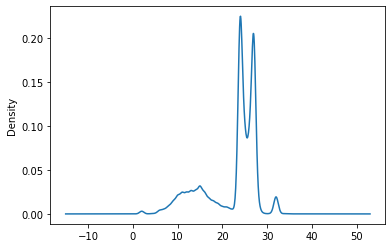

In [99]:
df.FQDN_count.plot.kde()

### subdomain_length -> Mild left-skewed = -0.590480

In [147]:
# mean < median
print(df.subdomain_length.median())
print(df.subdomain_length.mean())

7.0
6.059021016584973


<AxesSubplot:ylabel='Density'>

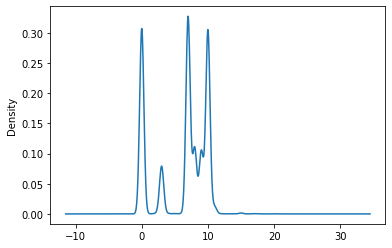

In [101]:
df.subdomain_length.plot.kde()

### upper -> Moderate Right-skewed = 5.988737

<AxesSubplot:ylabel='Density'>

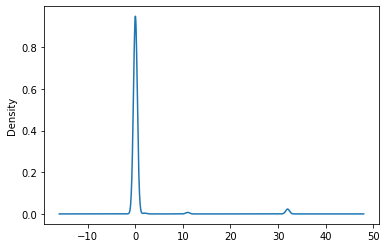

In [102]:
df.upper.plot.kde()

### lower -> Mild Right-skewed = 0.343449 so close to zero skew (normal distribution)

In [139]:
# mean == median
print(df.lower.median())
print(df.lower.mean())

10.0
10.410013652946574


<AxesSubplot:ylabel='Density'>

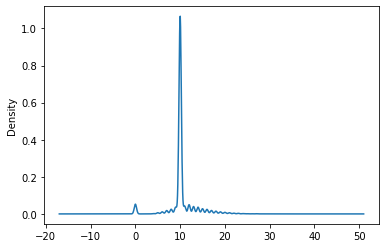

In [136]:
df.lower.plot.kde()

### numeric -> Mild left-skewed = -0.594384

<AxesSubplot:ylabel='Density'>

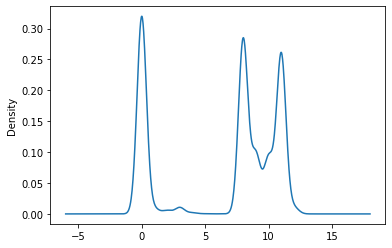

In [107]:
df.numeric.plot.kde()

### entropy -> Mild left-skewed = -0.140156, almost zero skew (normal distribution)

<AxesSubplot:ylabel='Density'>

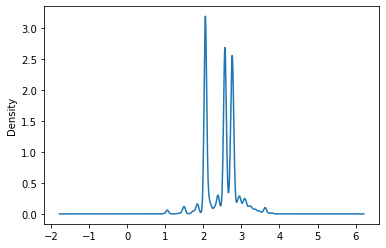

In [140]:
df.entropy.plot.kde()

### special -> Mild left-skewed = -0.902972

<AxesSubplot:ylabel='Density'>

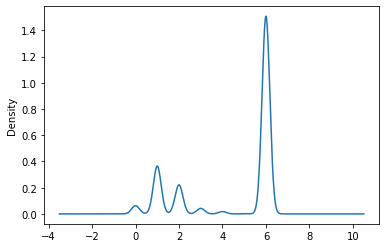

In [141]:
df.special.plot.kde()

### labels -> Mild left-skewed = -0.903680

<AxesSubplot:ylabel='Density'>

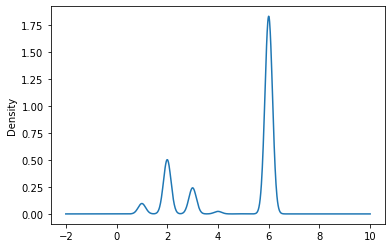

In [142]:
df.labels.plot.kde()

### labels_max -> Moderate Right-skewed = 3.979910

<AxesSubplot:ylabel='Density'>

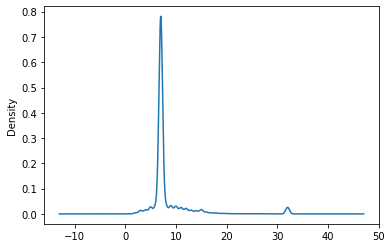

In [143]:
df.labels_max.plot.kde()

### labels_average -> Moderate Rgith-skewed = 5.087081

<AxesSubplot:ylabel='Density'>

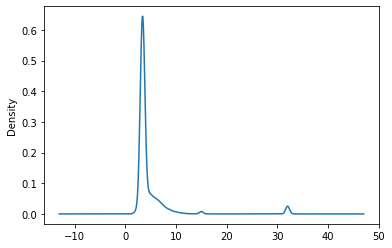

In [104]:
df.labels_average.plot.kde()

### longest_word -> Moderate Right-skewed = 1.461292

<AxesSubplot:ylabel='Density'>

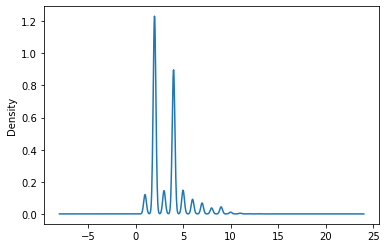

In [105]:
df.longest_word.plot.kde()

### sld -> Very Strong Right-skewed = 180.430308

<AxesSubplot:ylabel='Density'>

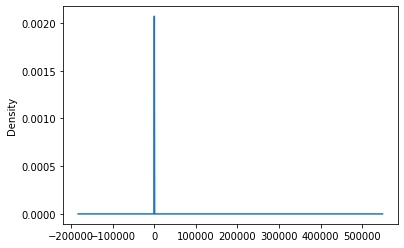

In [106]:
df.sld.plot.kde()

### len -> Moderate Right-skewed = 2.634801

<AxesSubplot:ylabel='Density'>

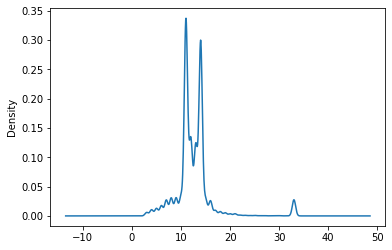

In [144]:
df.len.plot.kde()

### subdomain -> Moderate Left-skewed = -1.176397

<AxesSubplot:ylabel='Density'>

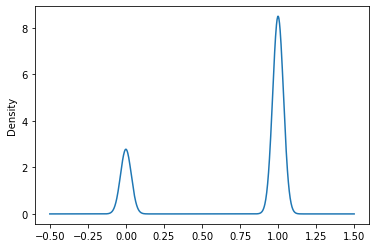

In [145]:
df.subdomain.plot.kde()

## Check Imbalance

* Target Attack -> Mild Left-skewed = -0.197046, almost zero skew (normal distribution)

<AxesSubplot:ylabel='Density'>

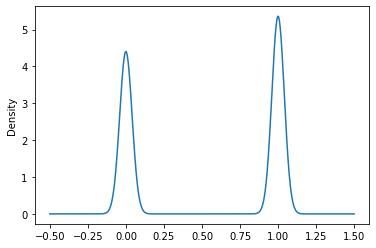

In [146]:
df["Target Attack"].plot.kde()

<AxesSubplot:xlabel='Target Attack', ylabel='count'>

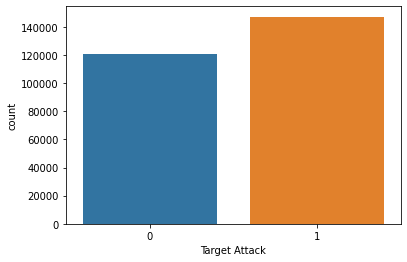

In [149]:
# plot count of each class
sns.countplot(df, x ="Target Attack")

In [150]:
# count of each class
df["Target Attack"].value_counts()

1    147179
0    120895
Name: Target Attack, dtype: int64

In [156]:
# percentage of the minority class
(120895/(len(df)))*100

45.09762229832061

When to say the data is imbalanced?<br>
I got the answer from this article https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data#:~:text=A%20classification%20data%20set%20with,smaller%20proportion%20are%20minority%20classes.<br><br>
There are 3 degrees of imbalance based on the percentage of the minority class:
- Mild (20-40% of the data set)<br>
- Moderate (1-20% of the data set)<br>
- Extreme (<1% of the data set)<br><br>
The percentage of our minority calss0 = 45.09%, which is more than 40% of the mild degree.<br>
So we can consider the data as balanced for now.

## TSNE Scatter Plot
TSNE is very useful in visualizing high dimentional data as it leverage the relationship between the point into a lower dimention<br>
We can get some insights about how to seperate the data. does it linearly seperable or non-linearly?

In [207]:
from sklearn.manifold import TSNE

tsne_model = TSNE(n_components=2)
tsne_data = tsne_model.fit_transform(df.iloc[:,1:-1])

c:\Users\river\anaconda3\envs\tf\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\river\anaconda3\envs\tf\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[Text(0.5, 1.0, 'T-SNE Data distribution Scatter plot')]

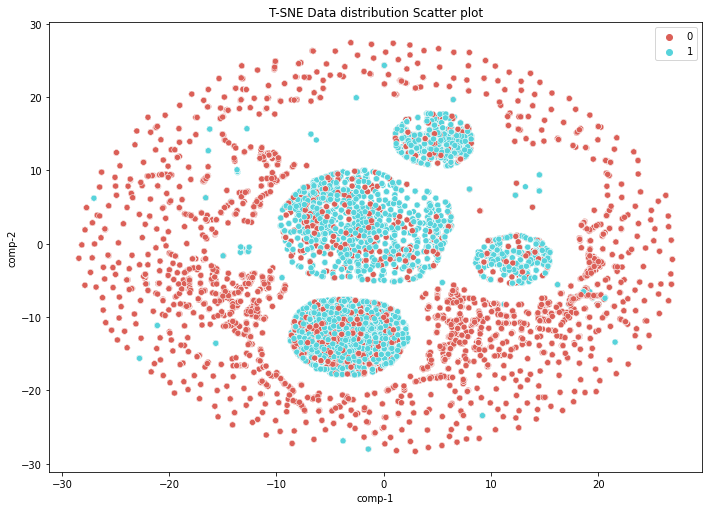

In [208]:
tsne_df = pd.DataFrame()
tsne_df["y"] = df.iloc[:,-1]
tsne_df["comp-1"] = tsne_data[:,0]
tsne_df["comp-2"] = tsne_data[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=tsne_df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=tsne_df).set(title="T-SNE Data distribution Scatter plot") 

# Train Test Split

In [6]:
X_df= df.iloc[:,1:-1]
y_df= df.iloc[:,-1]
X_df

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain
0,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1
1,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1
2,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1
3,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1
4,15,9,0,11,0,2.929439,4,3,5,4.333333,5,5,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268069,18,3,0,16,0,2.338623,2,3,10,5.333333,4,10,14,1
268070,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1
268071,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1
268072,16,0,0,14,0,3.249687,2,2,13,7.500000,5,13,14,0


### Split the data into Train:Test -> 70:30, then divide the training data into train:validation ->70:30<br>
The validation data is very important for Feature selection and hyperparameters tuning. Test data for model selection<br>
**Note**: I could have used K-fold cross-validation but it will take more time and I will have to implement it from scratch<br>
to apply feature selection methods on the training data only of each loop. (More complex)

In [8]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)

In [9]:
print("X_train_val.shape =",X_train_val.shape)
print("y_train_val.shape =",y_train_val.shape)
print("X_train.shape =",X_train.shape)
print("y_train.shape =",y_train.shape)
print("X_val.shape =",X_val.shape)
print("y_val.shape =",y_val.shape)
print("X_test.shape =",X_test.shape)
print("y_test.shape =",y_test.shape)


X_train_val.shape = (187651, 14)
y_train_val.shape = (187651,)
X_train.shape = (131355, 14)
y_train.shape = (131355,)
X_val.shape = (56296, 14)
y_val.shape = (56296,)
X_test.shape = (80423, 14)
y_test.shape = (80423,)


In [10]:
y_train.reset_index(inplace=True,drop=True)
y_val.reset_index(inplace=True,drop=True)
y_test.reset_index(inplace=True,drop=True)
y_train_val.reset_index(inplace=True,drop=True)

# X_train.reset_index(inplace=True,drop=True)
# X_val.reset_index(inplace=True,drop=True)
# X_test.reset_index(inplace=True,drop=True)
# X_train_val.reset_index(inplace=True,drop=True)

# Data Scalling
Some ML models assumes input data with Gaussian distribution like Gaussian Naive Bayes. So, I will apply Standard Scaller

In [15]:
from sklearn.preprocessing import StandardScaler


std = StandardScaler()
## Fit on the Training data only then transform on validation 
X_train_scalled = std.fit_transform(X_train)
X_val_scalled = std.transform(X_val)

## Fit on the whole Training data only then transform on test 
X_train_val_scalled = std.fit_transform(X_train_val)
X_test_scalled = std.transform(X_test)


# Baseline Model

More intuitive to have a baseline performance. For the model selection:<br>
•	I need a fast training model. I don't care about accuracy at this point because I need this model to apply different feature selection methods with different K number of features.<br>
•	I am not interested in model explainability at this point.<br>
•	The training data is too large.<br>
So, answer is the Naive Bayes model.<br><br>

Guided by this Blog: https://blogs.sas.com/content/subconsciousmusings/2020/12/09/machine-learning-algorithm-use/

## TSNE Scatter Plot for the training Data

c:\Users\river\anaconda3\envs\tf\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\river\anaconda3\envs\tf\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[Text(0.5, 1.0, 'T-SNE Training Data distribution Scatter plot')]

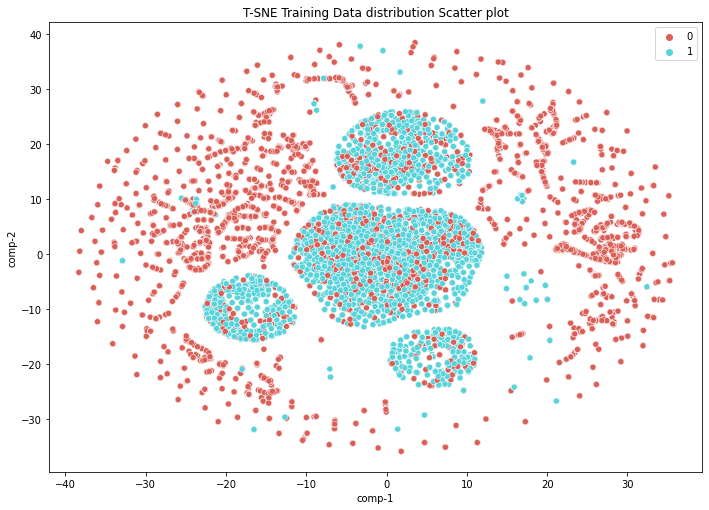

In [210]:
tsne_train_model = TSNE(n_components=2)
tsne_train_data = tsne_train_model.fit_transform(X_train)
tsne_train_df = pd.DataFrame()
tsne_train_df["y"] = y_train
tsne_train_df["comp-1"] = tsne_train_data[:,0]
tsne_train_df["comp-2"] = tsne_train_data[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=tsne_train_df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=tsne_train_df).set(title="T-SNE Training Data distribution Scatter plot") 

## Naive Bayes

In [55]:
gnb_baseline_model = GaussianNB()

* Validation baseline

In [56]:
gnb_baseline_model.fit(X_train_scalled, y_train)
pred_nb = gnb_baseline_model.predict(X_val_scalled)
# classification_report,accuracy_score
baseline_val_f1 = f1_score(y_val, pred_nb)
print(baseline_val_f1)
print(classification_report(y_val, pred_nb))

0.8392559889990591
              precision    recall  f1-score   support

           0       0.89      0.64      0.74     25365
           1       0.76      0.94      0.84     30931

    accuracy                           0.80     56296
   macro avg       0.83      0.79      0.79     56296
weighted avg       0.82      0.80      0.80     56296



* Test baseline

In [73]:
gnb_baseline_model.fit(X_train_val_scalled, y_train_val)

GaussianNB()

In [74]:
%%time
pred_nb = gnb_baseline_model.predict(X_test_scalled)

Wall time: 34 ms


In [75]:
baseline_test_f1 = f1_score(y_test, pred_nb)
print(baseline_test_f1)
print(classification_report(y_test, pred_nb))

0.8417668408973723
              precision    recall  f1-score   support

           0       0.90      0.64      0.75     36167
           1       0.76      0.94      0.84     44256

    accuracy                           0.81     80423
   macro avg       0.83      0.79      0.79     80423
weighted avg       0.82      0.81      0.80     80423



# Feature Filtering/Selection
Important Note: Feature Filtering/Selection **Must** be based on the training data only

In [29]:
train_df = X_train.copy()
train_df["Target Attack"] = y_train.copy()
train_df.reset_index(inplace=True,drop=True)

## Correlation and Heatmap 

In [30]:
train_df.corr()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
FQDN_count,1.000000,0.788875,0.223416,-0.097550,0.793661,0.168668,0.748100,0.739629,0.186949,0.109678,-0.338531,0.030120,0.589338,0.699107,0.563153
subdomain_length,0.788875,1.000000,-0.266937,-0.070881,0.945057,-0.014102,0.929565,0.923648,-0.410902,-0.431937,-0.406748,0.038007,0.090743,0.889450,0.571627
upper,0.223416,-0.266937,1.000000,-0.558730,-0.237280,0.117800,-0.348467,-0.361027,0.849283,0.947660,-0.227932,-0.011936,0.761196,-0.300114,0.071164
lower,-0.097550,-0.070881,-0.558730,1.000000,-0.193620,0.378240,-0.064700,-0.052544,-0.083142,-0.325185,0.604038,-0.019829,-0.081146,0.038632,-0.291740
numeric,0.793661,0.945057,-0.237280,-0.193620,1.000000,-0.080930,0.941850,0.939965,-0.394682,-0.410877,-0.465868,0.047078,0.039362,0.802565,0.597790
entropy,0.168668,-0.014102,0.117800,0.378240,-0.080930,1.000000,-0.190411,-0.224875,0.417119,0.307392,0.015402,-0.022415,0.525033,-0.137035,-0.115540
special,0.748100,0.929565,-0.348467,-0.064700,0.941850,-0.190411,1.000000,0.991327,-0.478279,-0.526235,-0.337018,0.041851,-0.070074,0.891454,0.580974
labels,0.739629,0.923648,-0.361027,-0.052544,0.939965,-0.224875,0.991327,1.000000,-0.498138,-0.546025,-0.321397,0.042609,-0.096406,0.899713,0.568079
labels_max,0.186949,-0.410902,0.849283,-0.083142,-0.394682,0.417119,-0.478279,-0.498138,1.000000,0.955355,0.092852,-0.022236,0.856026,-0.421095,-0.095581
labels_average,0.109678,-0.431937,0.947660,-0.325185,-0.410877,0.307392,-0.526235,-0.546025,0.955355,1.000000,-0.049458,-0.021672,0.802906,-0.473915,-0.077232


<AxesSubplot:>

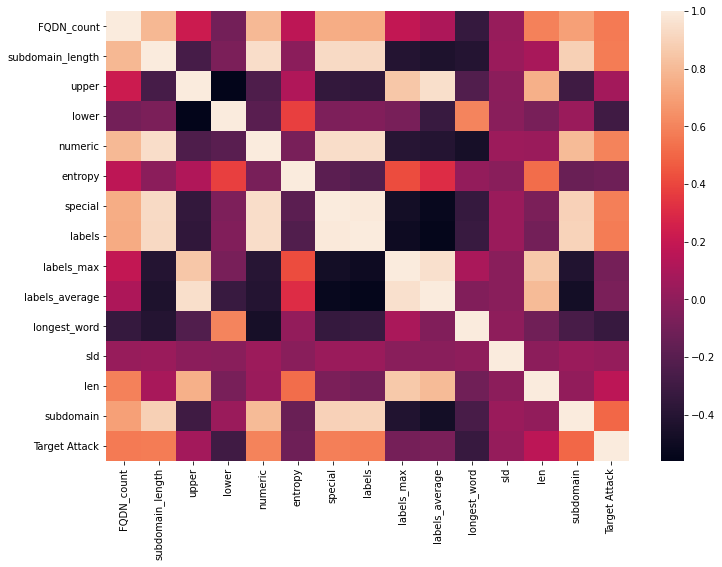

In [32]:
from matplotlib import rcParams

rcParams["figure.figsize"] = 11.7,8.27
sns.heatmap(train_df.corr())

Obviousely there are some redundant features which are highly correlated to each other like labels_max with labels_average, and special with labels.<br>
However, I leave them to see how the feature selection algorithms will act.

## Anova Feature Selection
for numerical features and categorical targets Anova is widely used as a feature selection algorithm. It separates the valuable features from the noise.


In [321]:
k_range = range(1,15,1)
f1_anova_accuracies = []
anova_filters =[]
for k in k_range:
    anova_filter = SelectKBest(f_classif, k=k)
    X_train_anova = anova_filter.fit_transform(X_train_scalled, y_train)
    X_val_anova = anova_filter.transform(X_val_scalled)
    gnb_baseline_model.fit(X_train_anova,y_train)
    pred_anova = gnb_baseline_model.predict(X_val_anova)
    f1_anova_accuracies.append(f1_score(y_val,pred_anova))
    anova_filters.append(anova_filter)

**Note**: Feature selection method is fitted once on the training data then the transformation is applied on the validation 

### Anova F1-scores Vs Baseline plot

Baseline F1-score =  0.8392559889990591
Anova best F1-score =  0.8392559889990591
Anova best featuers =  ['subdomain_length' 'numeric' 'special']


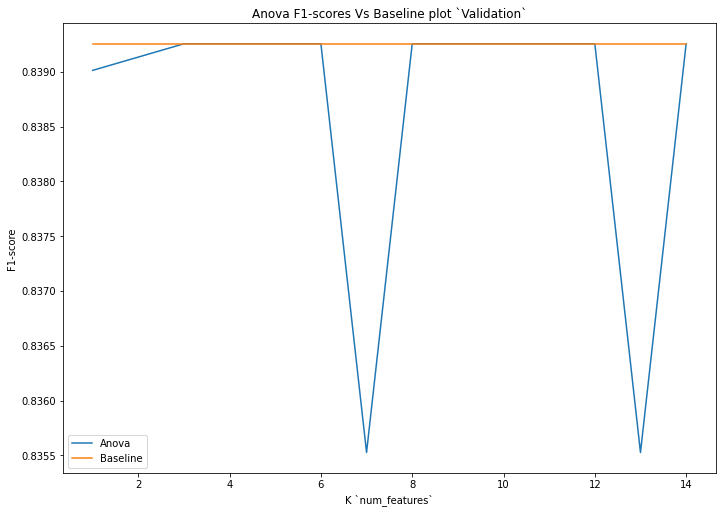

In [324]:
print("Baseline F1-score = ",baseline_val_f1)
print("Anova best F1-score = ", max(f1_anova_accuracies))
print("Anova best featuers = ", anova_filters[np.argmax(f1_anova_accuracies)].get_feature_names_out(X_df.columns))
plt.plot(k_range, f1_anova_accuracies, label= "Anova")
plt.plot(k_range, [baseline_val_f1]*len(k_range), label= "Baseline")
plt.legend()
plt.xlabel("K `num_features`")
plt.ylabel("F1-score")
plt.title("Anova F1-scores Vs Baseline plot `Validation`")
plt.show()

Very Nice, we can use only 3 features instead of the whole 14 feature and get the same results as the baseline.

## MRMR (Maximum Relevance - Minimum Redundancy)
I'd like to try MRMR feature selection method produced by the Uber research team<br>
feature selection MRMR (short for Maximum Relevance - Minimum Redundancy).<br>
Briefly, as the name states, it tries to select the K features that have highest F-statistics with the target (Maximum Relevance) with the lowest Pearson correlation with each other (Minimum Redundancy).<br>
Fore more information: https://lnkd.in/dHxhC3S

In [ ]:
%pip install mrmr_selection

In [294]:
# Convert scalled data numpy into dataframe
X_train_scalled_df = pd.DataFrame()
X_val_scalled_df = pd.DataFrame()
for i, col in enumerate(X_train.columns):
    X_train_scalled_df[col] = X_train_scalled[:,i]
    X_val_scalled_df[col] = X_val_scalled[:,i]

In [293]:
# Example of MRMR output
from mrmr import mrmr_classif
selected_features = mrmr_classif(X_train_scalled_df, y_train, K = 10)
selected_features

100%|██████████| 10/10 [00:02<00:00,  4.58it/s]


['numeric',
 'len',
 'special',
 'lower',
 'subdomain_length',
 'labels',
 'FQDN_count',
 'subdomain',
 'longest_word',
 'entropy']

In [325]:
k_range = range(1,15,1)
f1_MRMR_accuracies = []
MRMR_features = []
for k in k_range:
    # MRMR_features contains selected features list
    MRMR_filter = mrmr_classif(X_train_scalled_df, y_train, K = k)
    gnb_baseline_model.fit(X_train_scalled_df[MRMR_filter],y_train)
    pred_mrmr = gnb_baseline_model.predict(X_val_scalled_df[MRMR_filter])
    f1_MRMR_accuracies.append(f1_score(y_val,pred_mrmr))
    MRMR_features.append(MRMR_filter)

100%|██████████| 14/14 [00:04<00:00,  2.89it/s]


### MRMR F1-scores Vs Baseline plot

Baseline F1-score =  0.8392559889990591
MRMR best F1-score =  0.8397772474144789
MRMR best featuers =  ['numeric', 'len', 'special', 'lower', 'subdomain_length']


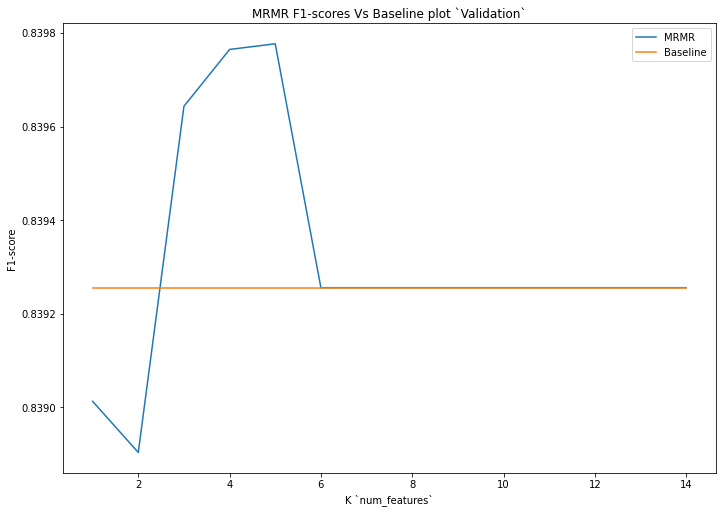

In [326]:
print("Baseline F1-score = ", baseline_val_f1)
print("MRMR best F1-score = ", max(f1_MRMR_accuracies))
print("MRMR best featuers = ", MRMR_features[np.argmax(f1_MRMR_accuracies)])
plt.plot(k_range, f1_MRMR_accuracies, label= "MRMR")
plt.plot(k_range, [baseline_val_f1]*len(k_range), label= "Baseline")
plt.legend()
plt.xlabel("K `num_features`")
plt.ylabel("F1-score")
plt.title("MRMR F1-scores Vs Baseline plot `Validation`")
plt.show()

With only 5 features we can get a higher f1-score than the baseline. <br>
MRMR feature selection has proven to be more effective than Anova as even with the same number of features 3 it was able to get the most important features and have a higher f1-score.<br>
MRMR best features =  ['numeric', 'len', 'special', 'lower', 'subdomain_length'], Those are the most important features that I will use in training the models.<br>
**Note** :The results are in ascending order of feature importance.

## Prepare the data for training with the selected features

In [16]:
best_featues = ['numeric', 'len', 'special', 'lower', 'subdomain_length']
all_features = list(X_df.columns)
# find the index of the non-important features then deleted them
drop_featues_idx = [all_features.index(feature) for feature in np.setdiff1d(all_features,best_featues)]
X_train_scalled_fs = np.delete(X_train_scalled, drop_featues_idx , axis = 1)
X_val_scalled_fs = np.delete(X_val_scalled, drop_featues_idx , axis = 1)
X_train_val_scalled_fs = np.delete(X_train_val_scalled, drop_featues_idx , axis = 1)
X_test_scalled_fs = np.delete(X_test_scalled, drop_featues_idx , axis = 1)

# Model Tuning

In [13]:
from catboost import CatBoostClassifier
from time import time
from sklearn.model_selection import GridSearchCV
from hypopt import GridSearch
from sklearn.model_selection import PredefinedSplit
from matplotlib import rcParams
from skopt import BayesSearchCV

rcParams["figure.figsize"] = 11.7,8.27

## CatBoostClassifier
CatBoost has a significant amount of performance potential and works remarkably well with the default settings, improving performance when tuned.<br>
It has many valuable features, but the one that's very powerful for this project, specifically after deployment is that it has the fastest prediction time when compared with XGBoost and LightBGM. Moreover, It's less prone to overfitting<br> 
The speed of processing and prediction time is as important as the prediction accuracy. In fact, the solutions in cybersecurity come in favor of one over the other, and to find one that combines both of them is a success.
For more information:https://neptune.ai/blog/when-to-choose-catboost-over-xgboost-or-lightgbm

In [17]:
%time
catBoost = CatBoostClassifier(random_seed = 0,verbose=0)
catBoost.fit(X_train_scalled_fs, y_train)

Wall time: 0 ns


In [18]:
pred_cat = catBoost.predict(X_val_scalled_fs)
cat_default_f1 = f1_score(y_val, pred_cat)
cat_default_f1

0.8637195334869753

### Hyperparameter tuning
BayesSearchCV is an informed search algorithm that learns from the previous iterations and makes use of it. It's much more efficient than the grid search as it doesn't try all the possibilities.<br>
Fore more information: https://towardsdatascience.com/grid-search-vs-random-search-vs-bayesian-optimization-2e68f57c3c46 

In [35]:

hyperparameters = {'depth':(4,5,7,8,9,10),
          'iterations':(100,250,500,1000),
          'learning_rate':(0.01,0.03,0.8,0.15,0.2), 
          'l2_leaf_reg':(1,3,5,10,100),# Coefficient at the L2 regularization term of the cost function. Any positive value is allowed
          }

# this step is important for the tuning evaluation to be based on the pre-defined validation list
# -1 for training and 0 for validation
split_index = [-1 if x in X_train.index else 0 for x in X_train_val.index]
ps = PredefinedSplit(test_fold=split_index)

catBoost_optizer = BayesSearchCV(catBoost,
                    hyperparameters,
                    scoring="f1",
                    cv=ps,
                    n_iter=100,
                    optimizer_kwargs={'base_estimator': 'GP'},
                    random_state=42)

In [ ]:
# using both training and validation as the spliting is passed in the ps object 
catBoost_optizer.fit(X_train_val_scalled_fs ,y_train_val)

In [51]:
# catBoost_optizer = optizer
print("catBoost_optizer.best_score_ :",catBoost_optizer.best_score_)
print("catBoost_optizer.best_params_ :",catBoost_optizer.best_params_)

catBoost_optizer.best_score_ : 0.8637550803782175
catBoost_optizer.best_params_ : OrderedDict([('depth', 7), ('iterations', 1000), ('l2_leaf_reg', 1), ('learning_rate', 0.15)])


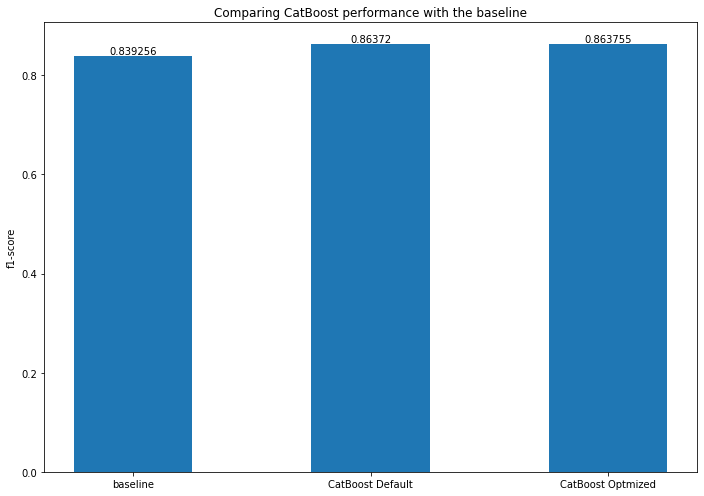

In [48]:

b = plt.bar(["baseline","CatBoost Default","CatBoost Optmized"], [baseline_val_f1, cat_default_f1, catBoost_optizer.best_score_], width = .5)
plt.bar_label(b)
plt.ylabel("f1-score")
plt.title("Comparing CatBoost performance with the baseline")
plt.show()

The plot showes that CatBoost have a higher f1-score than the baseline even with its default parameters. after tuning, the score didn't improve that much.<br>
The best hperparameters: [('depth', 7), ('iterations', 1000), ('l2_leaf_reg', 1), ('learning_rate', 0.15)]

## Multi-layer Perceptron
When it comes to accuracy and performance, then we should try NN especially, when a large dataset is available like that we have.

In [14]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state = 0)
mlp.fit(X_train_scalled_fs,y_train)
pred_mlp = mlp.predict(X_val_scalled_fs)
mlp_default_f1 = f1_score(y_val, pred_mlp)
mlp_default_f1

0.8632799944098946

### Hyperparameter tuning
BayesSearchCV is an informed search algorithm that learns from the previous iterations and makes use of it. It's much more efficient than the grid search as it doesn't try all the possibilities.<br>
Fore more information: https://towardsdatascience.com/grid-search-vs-random-search-vs-bayesian-optimization-2e68f57c3c46 

In [51]:
hyperparameters = {
    # "hidden_layer_sizes": [(50,),(100,),(150,)],
    "activation":["identity", "logistic", "tanh", "relu"],
          'alpha':(0.0001,0.001,0.003,0.006),# Strength of the L2 regularization term
          'max_iter':(10,30,50,100,200), 
          'learning_rate':("constant","invscaling","adaptive"),
          "learning_rate_init":(0.0005,0.001,0.005,0.01)
          }

# this step is important for the tuning evaluation to be based on the pre-defined validation list
# -1 for training and 0 for validation indexes
split_index = [-1 if x in X_train.index else 0 for x in X_train_val.index]
ps = PredefinedSplit(test_fold=split_index)

mlp_optizer = BayesSearchCV(mlp,
                    hyperparameters,
                    scoring="f1",
                    cv=ps,
                    n_iter=100,
                    optimizer_kwargs={'base_estimator': 'GP'},
                    random_state=42)

In [52]:
mlp_optizer.fit(X_train_val_scalled_fs ,y_train_val)

BayesSearchCV(cv=PredefinedSplit(test_fold=array([ 0, -1, ...,  0, -1])),
              estimator=MLPClassifier(random_state=0), n_iter=100,
              optimizer_kwargs={'base_estimator': 'GP'}, random_state=42,
              scoring='f1',
              search_spaces={'activation': ['identity', 'logistic', 'tanh',
                                            'relu'],
                             'alpha': (0.0001, 0.001, 0.003, 0.006),
                             'learning_rate': ('constant', 'invscaling',
                                               'adaptive'),
                             'learning_rate_init': (0.0005, 0.001, 0.005, 0.01),
                             'max_iter': (10, 30, 50, 100, 200)})

In [53]:
print("mlp_optizer.best_score_ :",mlp_optizer.best_score_)
print("mlp_optizer.best_params_ :",mlp_optizer.best_params_)

mlp_optizer.best_score_ : 0.8635468599438602
mlp_optizer.best_params_ : OrderedDict([('activation', 'logistic'), ('alpha', 0.0001), ('learning_rate', 'constant'), ('learning_rate_init', 0.01), ('max_iter', 100)])


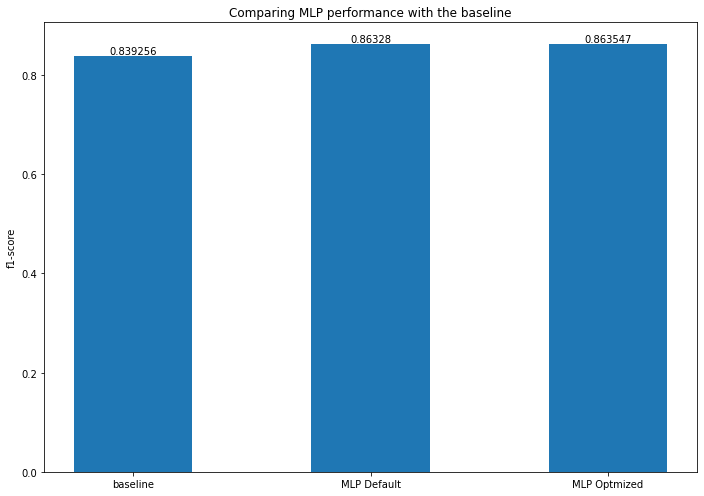

In [61]:

b = plt.bar(["baseline","MLP Default","MLP Optmized"], [baseline_val_f1, mlp_default_f1, mlp_optizer.best_score_], width = .5)
plt.bar_label(b)
plt.ylabel("f1-score")
plt.title("Comparing MLP performance with the baseline")
plt.show()

The plot showes that MLP have a higher f1-score than the baseline even with its default parameters. after tuning, the score didn't improve that much.<br>
The best hperparameters: [('activation', 'logistic'), ('alpha', 0.0001), ('learning_rate', 'constant'), ('learning_rate_init', 0.01), ('max_iter', 100)]

# Model Selection
Train the models using the best Hyperparameters in the previous step using the training and validation data combinded.<br>
Then, comparing the results using the test data. <br>
Although the data nearly balanced, I will use the F1-score metric.<br>
It’s best to include both precision and recall because the costs of false positives and false negatives differ significantly and they have a different impact on the enterprise networks.The evaluation metrics are f1-score, Recall, Precision and the prediction time in an ascending order of their importance.

## CatBoost

In [17]:
catBoost = CatBoostClassifier(depth= 7, iterations= 1000, l2_leaf_reg= 1, learning_rate= 0.15,random_seed = 0,verbose=0)
catBoost.fit(X_train_val_scalled_fs, y_train_val)

### Prediction Time

In [66]:
%%time
pred_cat = catBoost.predict(X_test_scalled_fs)

Wall time: 54 ms


## MLP

In [67]:
%%time
mlp = MLPClassifier(**mlp_optizer.best_params_,random_state = 0)
mlp.fit(X_train_val_scalled_fs, y_train_val)

Wall time: 41.6 s


MLPClassifier(activation='logistic', learning_rate_init=0.01, max_iter=100,
              random_state=0)

### Prediction Time

In [69]:
%%time
pred_mlp = mlp.predict(X_test_scalled_fs)

Wall time: 118 ms


## Comparison

In [70]:
catBoost_f1 = f1_score(y_test,pred_cat)
mlp_f1 = f1_score(y_test,pred_mlp)

print("CatBoost F1-score: ",catBoost_f1)
print(classification_report(y_test,pred_cat))

print("MLP F1-score: ",mlp_f1)
print(classification_report(y_test,pred_mlp))


CatBoost F1-score:  0.8644909126441275
              precision    recall  f1-score   support

           0       1.00      0.62      0.76     36167
           1       0.76      1.00      0.86     44256

    accuracy                           0.83     80423
   macro avg       0.88      0.81      0.81     80423
weighted avg       0.87      0.83      0.82     80423

MLP F1-score:  0.8637083993660856
              precision    recall  f1-score   support

           0       1.00      0.62      0.76     36167
           1       0.76      1.00      0.86     44256

    accuracy                           0.83     80423
   macro avg       0.88      0.81      0.81     80423
weighted avg       0.87      0.83      0.82     80423



They are having an identical classification report (same Recall, and Precision). So we are left with F1-score and the prediction time.

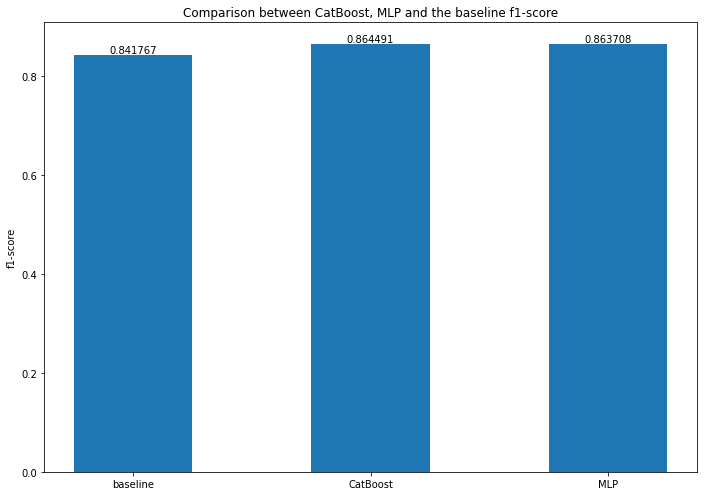

In [72]:

b = plt.bar(["baseline","CatBoost","MLP"], [baseline_test_f1, catBoost_f1, mlp_f1], width = .5)
plt.bar_label(b)
plt.ylabel("f1-score")
plt.title("Comparison between CatBoost, MLP and the baseline f1-score")
plt.show()

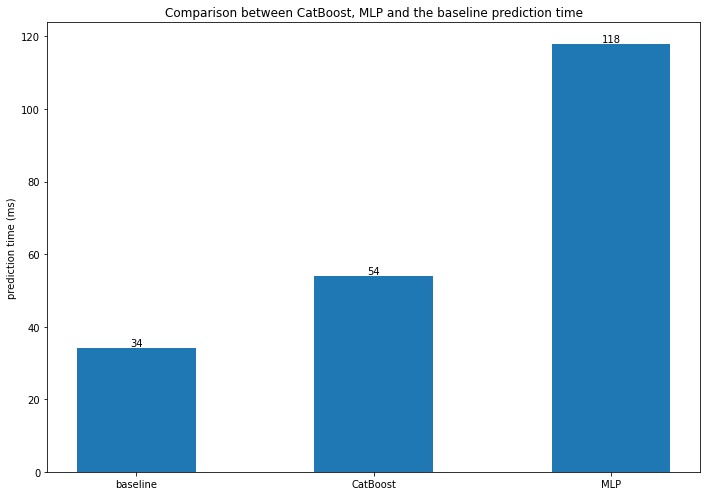

In [77]:
b = plt.bar(["baseline","CatBoost","MLP"], [34, 54, 118], width = .5)
plt.bar_label(b)
plt.ylabel("prediction time (ms)")
plt.title("Comparison between CatBoost, MLP and the baseline prediction time")
plt.show()

CatBoost has the highest F1-score. Also, it has a lower prediction time than MLP and slightly higher than the baseline prediction time.<br>
F1-score is more important than the prediction time, and the difference between the baseline time and CatBoost is just 20 ms.<br>
So the champion model is CatBoost.

# Prepare For Deployment
Now after selecting the best model, There's no need for splitting  and wasting the data. So I will train the model on the whole data 

* useing pipline to make it easier 

In [5]:
from sklearn.pipeline import Pipeline

selected_features = ['numeric', 'len', 'special', 'lower', 'subdomain_length']
catBoost_pipe = Pipeline(steps=[("Scaler", StandardScaler()),("CatBoost", CatBoostClassifier(depth= 7, iterations= 1000, l2_leaf_reg= 1, learning_rate= 0.15,random_seed = 0,verbose=0))])

catBoost_pipe.fit(df[selected_features],df["Target Attack"])

<IPython.core.display.Javascript object>

Pipeline(steps=[('Scaler', StandardScaler()),
                ('CatBoost',
                 <catboost.core.CatBoostClassifier object at 0x00000223283706A0>)])

In [7]:
catBoost_pipe.score(df[selected_features],catBoost_pipe.predict(df[selected_features]))

1.0

* save the model

In [8]:
import pickle
pickle.dump(catBoost_pipe, open('CatBoost_pipe.pkl', 'wb'))